Local prominent streaks: [
 []
[[1, 1, 3]]
[[1, 1, 3]]
[[1, 1, 3]]
[[[1, 1, 3]], [3, 4, 7]]
[[[[1, 1, 3]], [3, 4, 7]]]
[[[[[1, 1, 3]], [3, 4, 7]]], [6, 6, 5]]
[[[[[1, 1, 3]], [3, 4, 7]]], [6, 6, 5]]
[[[[[1, 1, 3]], [3, 4, 7]]], [6, 6, 5]]
[[[[[[1, 1, 3]], [3, 4, 7]]], [6, 6, 5]], [9, 9, 7], [6, 9, 4], [8, 9, 6]]
]

Growing streaks: [
 [1, 1, 3]
[1, 2, 1]
[[1, 3, 1], [3, 3, 7]]
[[1, 4, 1], [3, 4, 7]]
[[1, 5, 1], [3, 5, 2]]
[[1, 6, 1], [3, 6, 2], [6, 6, 5]]
[[1, 7, 1], [3, 7, 2], [6, 7, 4]]
[[1, 8, 1], [3, 8, 2], [8, 8, 6], [6, 8, 4]]
[[1, 9, 1], [3, 9, 2], [9, 9, 7], [6, 9, 4], [8, 9, 6]]
[[1, 10, 1], [3, 10, 2], [6, 10, 3]]
]

Prominent streaks: [
 [[1, 1, 3]]
[[1, 2, 1], [[1, 1, 3]]]
[[3, 3, 7], [1, 3, 1]]
[[3, 4, 7], [1, 4, 1]]
[[3, 4, 7], [[1, 5, 1], [3, 5, 2]]]
[[3, 4, 7], [3, 6, 2], [1, 6, 1]]
[[3, 4, 7], [1, 7, 1], [3, 7, 2]]
[[3, 4, 7], [1, 8, 1], [3, 8, 2], [6, 8, 4]]
[[3, 4, 7], [1, 9, 1], [3, 9, 2], [6, 9, 4]]
[[3, 4, 7], [1, 10, 1], [3, 10, 2], [6, 10, 3], [6, 9, 4]]
]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


IndexError: ignored

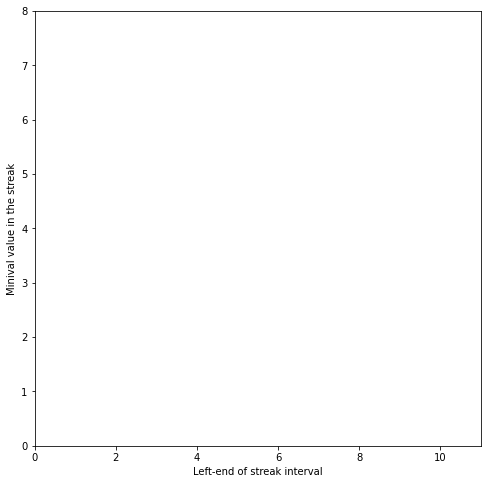

In [225]:
from matplotlib import pyplot as plt, rc
from matplotlib.animation import FuncAnimation

def init():
  global sequence
  global ax
  global lines

  #Set up the drawing area
  ax = plt.axes(xlim=(0, len(sequence)+1), ylim=(0, max(sequence)+1))
  ax.set_xlabel('Left-end of streak interval')
  ax.set_ylabel('Minival value in the streak')

  #Draw an empty line since the init() function must return some lines
  lines, = ax.plot([], [], lw=2)
  return lines,
 
def animate(i):
  global sequence
  global ax
  global lines
  global growing_streaks

  if i % 2 == 0:
    #Draw an horizontal line that represents the value at the [i//2 + 1]-th position in the sequence. 
    #If i equals 0, it is the 1st position in the sequence. 
    #If i equals 2, it is the 2nd position in the sequence.
    #And so on.
    ax.axhline(y=sequence[i//2], color='red', linestyle='-.')
    lines.set_data([], [])
    return lines, 
  else: 
    #Draw the markers that represent the growing streaks after the [i//2+1]-th value in the sequence.
    #If i equals 1, it is the 1st position in the sequence. 
    #If i equals 3, it is the 2nd position in the sequence.
    #And so on.
    ax.clear()
    ax.set_xlabel('Left-end of streak interval')
    ax.set_ylabel('Minival value in the streak')
    ax.set_xlim(0, len(sequence)+1)
    ax.set_ylim(0, max(sequence)+1)
    for gs in growing_streaks[i//2]:
      sc, = ax.plot(gs[0], gs[2], marker='s', markerfacecolor='none', markeredgecolor='green', markersize=12, ls='')
    return sc,



def llps(sequence):
  local_prominent_streaks = []
  growing_streaks = []
  prominent_streaks =[]
  
 
  list1 = [1, 1,sequence[0]]
  list2 = [1, 2,min(sequence[0:2])]
  list3= []
  local1 = []
  for i in range(0, len(sequence)):
      for j in range (1, len(sequence)):
          if list1[2] > sequence[1]:
              local2 = [list1]
              list2 = [1, 2,min(sequence[0:2])]
          elif list1[2] == sequence[1]:
              list2 = [1, 2,min(sequence[0:2])]
              
          else:
               list2 = [1, 2,min(sequence[0:2])]
               list2.append ([2, 2,[sequence[1]]])
          if list2[2] > sequence[2]:
              local3 = list2 
              list3 = [1, 3,min(sequence[0:3])]
          elif list2[2] == sequence[2]:
              list3 = [1, 3,min(sequence[0:3])]
              
          else:
               list3 = [[1, 3,min(sequence[0:3])]]
               list3.append ([3, 3,sequence[2]])
               local3 = local2
          
          if list3[0][2] or list3[1][2] == sequence[3]:
              list4 = [[1, 4,min(sequence[0:4])]]
              list4.append([3, 4, sequence[3]])
              local4 = local3
          elif list3[0][2] or list3[1][2]> sequence[3]:
              local4 = list3
              list4 = [1, 4,min(sequence[0:4])]      
              
          else:
               list4 = [[1, 4,min(sequence[0:4])]]
               list4.append ([4, 4,sequence[4]])
               local4 = local3
                                  
          if list4[1][2] > sequence[4]:
              local5 = [local4]
              local5.append(list4[1])
              list5 = [[1, 5,min(sequence[0:5])]]
              list5.append ([3, 5,min(sequence[3:5])])
          elif list4[0][2] or list4[1][2] == sequence[4]:
              list5 = [1, 5,min(sequence[0:5])]
              
          else:
               list5 = [[1, 5,min(sequence[0:5])]]
               list5.append ([5, 5,sequence[4]])
               local5 = local4
          
          if list5[1][2] > sequence[5]:
              local6 = [local5]
              local6.append(list5[1])
              list6 = [[1, 6,min(sequence[0:6])]]
              list6.append ([3, 6,min(sequence[3:6])])
          elif list5[1][2] == sequence[5]:
              list6 = [1, 6,min(sequence[0:6])]
              local6 = [local5]
          else:
               list6 = [[1, 6,min(sequence[0:6])]]
               list6.append ([3, 6,min(sequence[3:6])])
               list6.append ([6, 6,sequence[5]])
               local6 = [local5]
                  
    
          if list6[1][2] > sequence[6]:
              local7 = [local6]
              local7.append(list6[1])
              list7 = [[1, 7,min(sequence[0:7])]]
              list7.append ([3, 7,min(sequence[3:7])])
              list7.append ([6, 7,min(sequence[6:7])])
          elif list6[2][2] > sequence[6]:
              local7 = [local6]
              local7.append(list6[2])
              list7 = [[1, 7,min(sequence[0:7])]]
              list7.append ([3, 7,min(sequence[3:7])])  
              list7.append ([6, 7,min(sequence[6:7])])   
          elif list6[1][2] or list6[2][2] == sequence[6]:
              list7 = [1, 7,min(sequence[0:7])]
              local7 = [local6]
          else:
               list7 = [[1, 7,min(sequence[0:7])]]
               list7.append ([3, 7,min(sequence[3:7])])
               list7.append ([7, 7,sequence[6]])
               local7 = [local6]
          if list7[1][2] > sequence[7]:
              local8 = local7
              local8.append(list7[1])
              list8 = [[1, 8,min(sequence[0:8])]]
              list8.append ([3, 8,min(sequence[3:8])])
              list8.append ([6, 8,min(sequence[6:8])])             
          elif list7[2][2] > sequence[7]:
              local8 = local7
              local8.append(list7[2])
              list8 = [[1, 8,min(sequence[0:8])]]
              list8.append ([3, 8,min(sequence[3:8])])  
              list8.append ([6, 8,min(sequence[6:8])])   
                   
          elif list7[2][2] == sequence[7]:
              list8 = [1, 8,min(sequence[0:8])]
              local8 = local7
              list8 = [[1, 8,min(sequence[0:8])]]
              list8.append ([3, 8,min(sequence[3:8])])
              list8.append ([8, 8,sequence[7]])
             
          elif list7[1][2] == sequence[7]:
              list8 = [1, 8,min(sequence[0:8])]
              local8 = local7
              list8 = [[1, 8,min(sequence[0:8])]]
              list8.append ([3, 8,min(sequence[3:8])])
              list8.append ([8, 8,sequence[7]])
               
          else:
               list8 = [[1, 8,min(sequence[0:8])]]
               list8.append ([3, 8,min(sequence[3:8])])
               list8.append ([8, 8,sequence[7]])
               local8 = local7 
               list8.append ([6, 8,min(sequence[6:8])])  
          if list8[1][2] > sequence[8]:
              local9 = local8
              local9.append(list8[1])
              list9 = [[1, 9,min(sequence[0:9])]]
              list9.append ([3, 9,min(sequence[3:9])])
              list9.append ([6, 9,min(sequence[6:9])])
                      
          elif list8[2][2] > sequence[8]:
              local9 = local8
              local9.append(list8[2])
              list9 = [[1, 9,min(sequence[0:9])]]
              list9.append ([3, 9,min(sequence[3:9])])  
              list9.append ([6, 9,min(sequence[6:9])]) 
              list9.append ([8, 9,min(sequence[7:9])])   
          elif list8[3][2] > sequence[8]:
              local9 = local8
              local9.append(list8[2])
              list9 = [[1, 9,min(sequence[0:9])]]
              list9.append ([3, 9,min(sequence[3:9])])  
              list9.append ([6, 9,min(sequence[6:9])])   
              list9.append ([8, 9,min(sequence[7:9])])               
          elif list8[1][2] == sequence[8]:
              list9 = [1, 9,min(sequence[0:9])]
              local9 = local8
              list9 = [[1, 9,min(sequence[0:9])]]
              list9.append ([3, 9,min(sequence[3:9])])
              list9.append ([9, 9,sequence[8]])            
              list9.append ([8, 9,min(sequence[7:9])]) 
          elif list8[2][2] == sequence[8]:
              list9 = [1, 9,min(sequence[0:9])]
              local9 = local8
              list9 = [[1, 9,min(sequence[0:9])]]
              list9.append ([3, 9,min(sequence[3:9])])
              list9.append ([9, 9,sequence[8]])             
              list9.append ([8, 9,min(sequence[7:9])]) 
          elif list8[3][2] == sequence[8]:
              list9 = [1, 9,min(sequence[0:9])]
              local9 = local8
              list9 = [[1, 9,min(sequence[0:9])]]
              list9.append ([3, 9,min(sequence[3:9])])
              list9.append ([9, 9,sequence[8]])         
              list9.append ([8, 9,min(sequence[7:9])])     
          else:
               list9 = [[1, 9,min(sequence[0:9])]]
               list9.append ([3, 9,min(sequence[3:9])])
               list9.append ([9, 9,sequence[8]])
               local9 = local8
               list9.append ([6, 9,min(sequence[6:9])])  
               list9.append ([8, 9,min(sequence[7:9])])    
          if list9[1][2] > sequence [9]:
               local10 = local9             
               local10.append(list9[1])
               list10 = [[1, 10,min(sequence[0:10])]]
               list10.append ([3, 10,min(sequence[3:10])])
               list10.append ([6, 10,min(sequence[6:10])])
                      
          elif list9[2][2] > sequence[9] or list9[2][2] > sequence[9] or list9[3][2] > sequence[9] or list9[4][2] > sequence[9]:
              local10 = []
              local10.append(local9)
              local10.append(list9[2])
              local10.append(list9[3])
              local10.append(list9[4])
              list10 = [[1, 10,min(sequence[0:10])]]
              list10.append ([3, 10,min(sequence[3:10])])
              list10.append ([6, 10,min(sequence[6:10])]) 
          elif list9[1][2] == sequence[9]:
              list10 = [1, 10,min(sequence[0:10])]
              local10 = local9
              list10 = [[1, 10,min(sequence[0:10])]]
              list10.append ([3, 10,min(sequence[3:10])])
              list10.append ([9, 9,sequence[9]])
           
              list9.append ([8, 9,min(sequence[7:9])]) 
          elif list9[2][2] == sequence[9]:
              list10 = [1, 10,min(sequence[0:10])]
              local10 = local9
              list10 = [[1, 10,min(sequence[0:10])]]
              list10.append ([3, 10,min(sequence[3:10])])
              list10.append ([9, 9,sequence[9]])
              
              list10.append ([8, 9,min(sequence[7:10])]) 
          elif list9[3][2] == sequence[9]:
              list10 = [1, 10,min(sequence[0:10])]
              local10 = local9
              list10 = [[1, 10,min(sequence[0:10])]]
              list10.append ([3, 10,min(sequence[3:10])])
              list10.append ([9, 9,sequence[9]])
          
              list10.append ([8, 9,min(sequence[7:10])])
          elif list9[4][2] == sequence[9]:
              list10 = [1, 10,min(sequence[0:10])]
              local10 = local9
              list10 = [[1, 10,min(sequence[0:10])]]
              list10.append ([3, 10,min(sequence[3:10])])
              list10.append ([9, 9,sequence[9]])
          
              list10.append ([8, 9,min(sequence[7:10])])
          else:
              list10 = [[1, 10,min(sequence[0:10])]]
              list10.append ([3, 10,min(sequence[3:10])])
              list10.append ([9, 9,sequence[9]])
              local10 = local9
              list10.append ([6, 9,min(sequence[6:10])])  
              list10.append ([8, 9,min(sequence[7:10])])    
                
          prom1 = [list1]
          prom2 = []
          if list2[1] - list2[0] > local2[0][1] - local2[0][0] and list2 [2] >= local2[0][2] or  list2[1] - list2[0] >= local2[0][1] - local2[0][0] and list2 [2] > local2[0][2]:
            prom2.append(list2)
          elif  local2[0][1] - local2[0][0] >  list2[1] - list2[0] and local2[0][2] >=list2 [2] or local2[0][1] - local2[0][0] >=list2[1] - list2[0] and local2[0][2] > list2 [2]:
            prom2.append(local2)
          else:
            prom2.append(list2) 
            prom2.append(local2)
          prom3 = []
          if  local3[0][1] - local3[0][0] > list3 [0][1] - list3[0][0]  and local3 [0][2] >=list3[0][2] or local3[0][1] - local3[0][0] >= list3 [0][1] - list3[0][0]  and local3 [0][2] >list3[0][2]:
             prom3.append(local3)  
          elif list3 [0][1] - list3[0][0] > local3[0][1] - local3[0][0] and list3[0][2] >=local3 [0][2] or list3 [0][1] - list3[0][0] >= local3[0][1] - local3[0][0] and list3[0][2] >local3[0][2]:
            prom3.append(list3[0])
          elif local3[0][1] - local3[0][0] > list3 [1][1] - list3[1][0]  and local3 [0][2] >=list3[1][2] or local3[0][1] - local3[0][0] >= list3 [1][1] - list3[1][0]  and local3 [0][2] >list3[1][2]:                       
             prom3.append(local3) 
          elif  list3 [1][1] - list3[1][0] > local3[0][1] - local3[0][0] and list3[0][2] >=local3 [0][2] or list3 [1][1] - list3[1][0] >= local3[0][1] - local3[0][0] and list3[1][2] >local3[0][2]:
             prom3.append(list3[1])
             prom3.append(list3[0])
          else:
            prom3.append(local3)
            prom3.append(list3)
          prom4 = []
          if  local4[0][1] - local4[0][0] > list4 [0][1] - list4[0][0]  and local4[0][2] >=list4[0][2] or local4[0][1] - local4[0][0] >= list4[0][1] - list4[0][0]  and local4 [0][2] >list4[0][2]:
             prom4.append(local4)  
          elif list4 [0][1] - list4[0][0] > local4[0][1] - local4[0][0] and list4[0][2] >=local4 [0][2] or list4[0][1] - list4[0][0] >= local4[0][1] - local4[0][0] and list4[0][2] >local4[0][2]:
            prom4.append(list4[0])
          elif local4[0][1] - local4[0][0] > list4[1][1] - list4[1][0]  and local4[0][2] >=list4[1][2] or local4[0][1] - local4[0][0] >= list4[1][1] - list4[1][0]  and local4 [0][2] >list4[1][2]:                       
             prom4.append(local4) 
          elif  list4[1][1] - list4[1][0] > local4[0][1] - local4[0][0] and list4[0][2] >=local4[0][2] or list4[1][1] - list4[1][0] >= local4[0][1] - local4[0][0] and list4[1][2] >local4[0][2]:
             prom4.append(list4[1])
             prom4.append(list4[0])
          else:
            prom4.append(local4)
            prom4.append(list4)
          prom5 = []
          if  local5[1][1] - local5[1][0] > list5[0][1] - list5[0][0] and local5[1][2] >=list5[0][2] or local5[1][1] - local5[1][0] >= list5[0][1] - list5[0][0]  and local5 [1][2] >list5[0][2]:
             prom5.append(local5[1])  
          elif list5[0][1] - list5[0][0] > local5[1][1] - local5[1][0] and list5[0][2] >=local5[1][2] or list5[0][1] - list5[0][0] >= local5[1][1] - local5[1][0] and list5[0][2] >local5[1][2]:
            prom5.append(list5[0])
          elif local5[1][1] - local5[1][0] > list5[1][1] - list5[1][0]  and local5[1][2] >=list5[1][2] or local5[1][1] - local5[1][0] >= list5[1][1] - list5[1][0]  and local5 [1][2] >list5[1][2]:                       
             prom5.append(local5[1]) 
          elif  list5[1][1] - list5[1][0] > local5[1][1] - local5[1][0] and list5[0][2] >=local5[1][2] or list5[1][1] - list5[1][0] >= local5[1][1] - local5[1][0] and list5[1][2] >local5[1][2]:
             prom5.append(list5[1])
             prom5.append(list5[0])
          else:
            prom5.append(local5[1])
            prom5.append(list5)
          prom6 = []
          if  list4[1][1] - list4[1][0] > list6[0][1] - list6[0][0] and list4[1][2] >=list6[0][2] or list4[1][1] - list4[1][0] >= list6[0][1] - list6[0][0]  and list4 [1][2] >list6[0][2]:
             prom6.append(list4[1])  
          elif list6[0][1] - list6[0][0] > list4[1][1] - list4[1][0] and list6[0][2] >=list4[1][2] or list6[0][1] - list6[0][0] >= list4[1][1] - list4[1][0] and list6[0][2] >list4[1][2]:
            prom6.append(list6[0])
          elif list4[1][1] - list4[1][0] > list6[1][1] - list6[1][0]  and list4[1][2] >=list6[1][2] or list4[1][1] - list4[1][0] >= list6[1][1] - list6[1][0]  and list4 [1][2] >list6[1][2]:                       
             prom6.append(list4[1]) 
          elif  list6[1][1] - list6[1][0] > list4[1][1] - list4[1][0] and list6[0][2] >=list4[1][2] or list6[1][1] - list6[1][0] >= list4[1][1] - list4[1][0] and list6[1][2] >list4[1][2]:
             prom6.append(list6[1])
             prom6.append(list6[0])
        
          elif list4[1][1] - list4[1][0] > list6[2][1] - list6[2][0]  and list4[1][2] >= list6[2][2] or list4[1][1] - list4[1][0] >= list6[2][1] - list6[2][0] and list4[1][2] > list6[2][2]:
             prom6.append(list4[1])
             prom6.append(list6[1])
             prom6.append(list6[0])
          else:
             prom6.append(list4[1])
             prom6.append(list6)   
          prom7 = []   
           
          if list7[0][1] - list7[0][0] > list7[2][1] - list7[2][0] and list7[0][2] >=list7[2][2] or list7[2][1] - list7[2][0] >= list7[0][1] - list7[0][0] and list7[0][2] >list7[2][2]:
            prom7.append(list7[0])
          elif local5[1][1]- local5[1][0] > list7[2][1] - list7[2][0] and local5[1][2] >= list7[2][2] or local5[1][1]- local5[1][0] >= list7[2][1] - list7[2][0] and local5[1][2] > list7[2][2]:
            prom7.append(local5[1])
            prom7.append (list7[0])
            prom7.append (list7[1])
          else: 
            prom7.append (list7[0])
            prom7.append (list7[1])
          prom8 = []
          if local5[1][1]- local5[1][0] > list8[2][1] - list8[2][0] and local5[1][2] >= list8[2][2] or local5[1][1]- local5[1][0] >= list8[2][1] - list8[2][0] and local5[1][2] > list8[2][2]:   
            prom8.append(local5[1])
            prom8.append(list8[0])
            prom8.append(list8[1])
            prom8.append(list8[3])
          elif list8[2][1] - list8[2][0] > local5[1][1]- local5[1][0] and list8[2][2] >= local5[1][2]  or list8[2][1] - list8[2][0] >=local5[1][1]- local5[1][0] and list8[2][2] > local5[1][2]:
            prom8.append(list8[2])
          else:
            prom8.append(list8[0])
            prom8.append(list8[1])
            prom8.append(list8[3]) 
          prom9 = []
          if local5[1][1]- local5[1][0] > list9[2][1] - list9[2][0] and local5[1][2] >= list9[2][2] or local5[1][1]- local5[1][0] >= list9[2][1] - list9[2][0] and local5[1][2] > list9[2][2]:   
            prom9.append(local5[1])
            prom9.append(list9[0])
            prom9.append(list9[1])
            prom9.append(list9[3])
          elif list9[2][1] - list9[2][0] > local5[1][1]- local5[1][0] and list9[2][2] >= local5[1][2]  or list9[2][1] - list9[2][0] >=local5[1][1]- local5[1][0] and list9[2][2] > local5[1][2]:
            prom9.append(list9[2])
          else:
            prom9.append(list9[0])
            prom9.append(list9[1])
            prom9.append(list9[3])
          prom10 = []  
          if local5[1][1]- local5[1][0] > list9[2][1] - list9[2][0] and local5[1][2] >= list9[2][2] or local5[1][1]- local5[1][0] >= list9[2][1] - list9[2][0] and local5[1][2] > list9[2][2]:   
            prom10.append(local5[1])
            prom10.append(list10[0])
            prom10.append(list10[1])
            prom10.append(list10[2])
            prom10.append(prom9[3])
          elif list9[2][1] - list9[2][0] > local5[1][1]- local5[1][0] and list9[2][2] >= local5[1][2]  or list9[2][1] - list9[2][0] >=local5[1][1]- local5[1][0] and list9[2][2] > local5[1][2]:
            prom10.append(list10[2])
          else:
            prom10.append(list10[0])
            prom10.append(list10[1])
            prom10.append(list10[3])     
         
  print ("Local prominent streaks: [\n",local1 )
  print (local2)
  print (local3)
  print (local4)
  print (local5)
  print (local6)
  print (local7)
  print (local8)
  print (local9)
  print (local10)
  print ("]")
  print ()
  
  print ("Growing streaks: [\n",list1 )
  print (list2)
  print (list3)
  print (list4)
  print (list5)
  print (list6)
  print (list7)
  print (list8)
  print (list9)
  print (list10)
  print ("]")
  print ()
  print ("Prominent streaks: [\n",prom1 )
  print(prom2)
  print(prom3)
  print(prom4)
  print(prom5)      
  print(prom6)
  print(prom7) 
  print(prom8)
  print(prom9)
  print (prom10) 
  print ("]")
  return growing_streaks, local_prominent_streaks


local_prominent_streaks = None
growing_streaks = None
prominent_streaks = None
sequence = [3, 1, 7, 7, 2, 5, 4, 6, 7, 3]
local_prominent_streaks, growing_streaks = llps(sequence)

fig = plt.figure(figsize=(8,8))
ax = None
lines = None

ani = FuncAnimation(fig, animate, init_func=init, frames=len(sequence*2), interval=1000, blit=True)
rc('animation', html='html5')
ani

